# Лабораторная работа №3

#### Исследование распределений и моментов связанных с преобразованием случайных величин

In [407]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

#### Задание №1.1

Инициализируем начальные вводные данные

In [408]:
circle_radius = 10
set_size = 1000

In [409]:
set_x, set_y = [], []

In [410]:
dots_counter = 0

Создаём выборку для случайно распределённых точек внутри окружности и устанавливаем условие для точек для пределов окружности

In [411]:
while dots_counter < set_size:
  x = np.random.uniform(-10, 10)
  y = np.random.uniform(-10, 10)

  if x**2 + y**2 <= circle_radius**2:
    set_x.append(x)
    set_y.append(y)
    dots_counter += 1

Описываем саму окружность

In [412]:
circle_angles = np.linspace(0, 2*np.pi, 100)
circle_x = circle_radius*np.cos(circle_angles)
circle_y = circle_radius*np.sin(circle_angles)

Визуализируем выборку

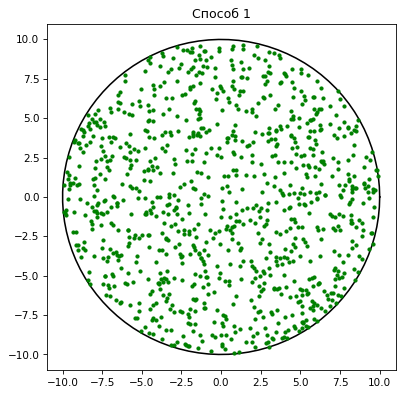

In [413]:
plt.figure(dpi=75, figsize=(6, 6))
plt.title("Способ 1")
plt.plot(circle_x, circle_y, "black")
plt.plot(set_x, set_y, ".", color="green")
plt.show()

#### Задание №1.2

Инициализируем начальные вводные данные

In [414]:
polar_x = []
polar_y = []

counter = 0

Создаём выборку для случайно распределённых точек внутри окружности способом задания полярных координат и устанавливаем условие для точек для пределов окружности

In [415]:
while counter < set_size:
  x = circle_radius*np.cos(np.random.uniform(0, 360))
  y = circle_radius*np.sin(np.random.uniform(0, 360))

  if x**2 + y**2 <= circle_radius**2:
    polar_x.append(x)
    polar_y.append(y)
    counter += 1

Визуализируем выборку

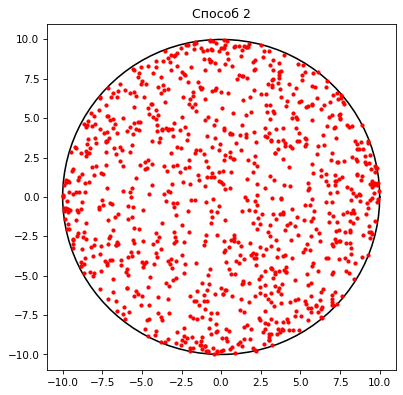

In [416]:
plt.figure(dpi=75, figsize=(6, 6))
plt.title("Способ 2")
plt.plot(circle_x, circle_y, "black")
plt.plot(polar_x, polar_y, ".", color="red")
plt.show()

#### Задание №2.1

Повторно визуализируем выборку

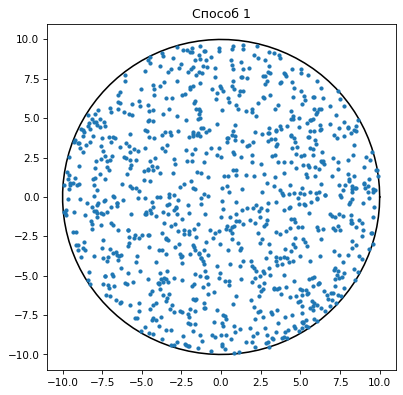

In [417]:
plt.figure(dpi=75, figsize=(6, 6))
plt.title("Способ 1")
plt.plot(circle_x, circle_y, "black")
plt.plot(set_x, set_y, ".")
plt.show()

#### Задание №2.2

Матожидание для точек

In [418]:
print("Mean for x: ", np.mean(set_x))
print("Mean for y: ", np.mean(set_y))

Mean for x:  0.1092757209539367
Mean for y:  -0.22932702684995723


Дисперсия для точек

In [419]:
print("Var for x: ", np.var(set_x))
print("Var for y: ", np.var(set_y))

Var for x:  26.67037285265606
Var for y:  25.40994774169217


#### Задание №2.3

Инициализируем начальные переменные для точки вне окружности

In [420]:
main_x = 20
main_y = 0

Функция для расчёта расстояния между точками

In [422]:
def distance(x1, y1, x2, y2):
  return np.sqrt(np.square((x2-x1)) + np.square((y2-y1)))

Выполняем расчёт плотности

In [424]:
def density(set_size, set_x, set_y, main_x, main_y):
  distances = []
  for i in range(set_size):
    distances.append(distance(set_x[i], set_y[i], main_x, main_y))
  distances.sort()
  return distances

In [427]:
distances = density(set_size, set_x, set_y, main_x, main_y)

In [428]:
kde_distances_y = gaussian_kde(distances).evaluate(distances)

Визуализируем плотность распределения

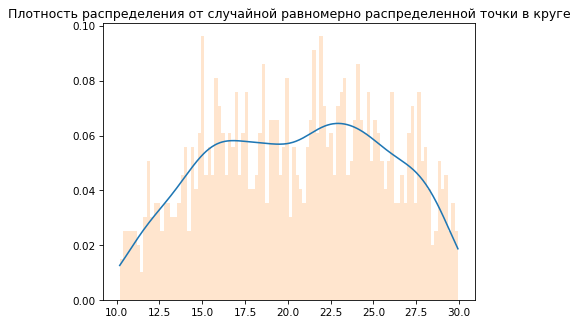

In [429]:
plt.figure(dpi=75)
plt.title("Плотность распределения от случайной равномерно распределенной точки в круге")
plt.plot(distances, kde_distances_y)
plt.hist(distances, bins=100, alpha=0.2, density=True)
plt.show()

#### Задание №2.4

Делаем расчёт плотности распределения для двух случайно выбранных точек из нашей начальной выборки

In [430]:
distances = []
for _ in range(set_size):
    idx1, idx2 = np.random.choice(set_size, 2, replace=False)
    distance = np.sqrt((set_x[idx2] - set_x[idx1])**2 + (set_y[idx2] - set_y[idx1])**2)
    distances.append(distance)

In [432]:
distances = np.array(distances)

kde = gaussian_kde(distances)

x_vals = np.linspace(0, np.max(distances), 1000) 
kde_y = kde.evaluate(x_vals)

Визуализируем плотность распределения

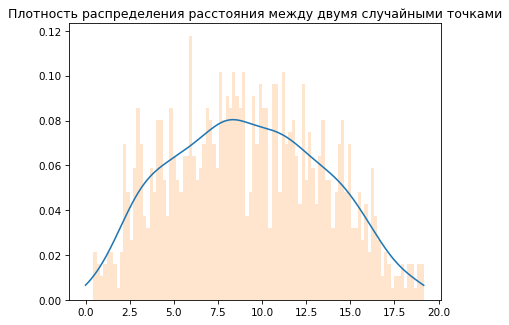

In [433]:
plt.figure(dpi=75)
plt.title("Плотность распределения расстояния между двумя случайными точками")
plt.plot(x_vals, kde_y) 
plt.hist(distances, bins=100, alpha=0.2, density=True)
plt.show()